## **Импортируем библиотеки для обработки данных**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## **Загружаем датасет**

In [2]:
adult_data = pd.read_csv('adult.csv') # <чтение файла с данными с сохранением в adult_data>

## **Описание датасета**

In [3]:
adult_data.shape # <получение общего размера таблицы adult_data>

(32561, 15)

In [4]:
adult_data.info() # <получение общей информации о данных в таблице adult_data>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_data.dtypes # <получение типов значений таблицы adult_data>

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
adult_data.columns # <получение названий столбцов таблицы adult_data>

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## **Предобработка данных**

In [7]:
# переименуем столбцы в adult_data
adult_data.set_axis(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'],axis = 'columns',inplace = True)

In [8]:
adult_data.columns # проверяем название столбцов

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
columns = list(adult_data.columns)

In [10]:
# узнаем уникальные значения столбцов
for column in columns:
    print(f"------------------------------------{column.title()}-----------------------------------------")
    data = adult_data.sort_values(by = column)
    data_unique = data[column].unique()
    print(data_unique)
    print('\n')

------------------------------------Age-----------------------------------------
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]


------------------------------------Workclass-----------------------------------------
['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


------------------------------------Fnlwgt-----------------------------------------
[  12285   13769   14878 ... 1366120 1455435 1484705]


------------------------------------Education-----------------------------------------
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


------------------------------------Education_Num-------------------------------------

In [11]:
adult_data = adult_data.replace('?', 'unknown') # заменяем значение '?' на 'unknown'

In [12]:
# проверяем наличие '?' в столбцах
for column in columns:
    print(f"? in {column}: {adult_data[(adult_data[column] == '?')].any().sum()}")

? in age: 0
? in workclass: 0
? in fnlwgt: 0
? in education: 0
? in education_num: 0
? in marital_status: 0
? in occupation: 0
? in relationship: 0
? in race: 0
? in sex: 0
? in capital_gain: 0
? in capital_loss: 0
? in hours_per_week: 0
? in native_country: 0
? in income: 0


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
adult_data.isnull().sum() # <суммарное количество пропусков, выявленных методом isnull() в таблице adult_data>

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
adult_data.duplicated().sum() # <получение суммарного количества дубликатов в таблице adult_data>

24

In [15]:
adult_data = adult_data.drop_duplicates().reset_index(drop=True) # <удаление всех дубликатов из таблицы adult_data специальным методом>

In [16]:
adult_data.duplicated().sum() # <проверка на отсутствие дубликатов>

0

In [17]:
# разделяем категориальные и числовые столбцы

categorical_columns = adult_data.dtypes[adult_data.dtypes == 'object']
numerical_columns = adult_data.dtypes[adult_data.dtypes == 'int64']

In [18]:
categorical_columns

workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
income            object
dtype: object

In [19]:
numerical_columns

age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

In [20]:
elementary_middle_school = ['1st-4th', '5th-6th', '7th-8th']
high_school = ['9th', '10th', '11th', '12th'] 

married = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
separated = ['Separated','Divorced']

self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']


In [21]:
adult_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **Исследование и визуализация данных**

Исследуем таблицу с распределением категориальных значений в датасете

In [22]:
for column in categorical_columns.index:
    print(f'--------------------{column.title()}-------------------------')
    total = adult_data[column].value_counts()
    percent = adult_data[column].value_counts() / adult_data.shape[0] * 100
    data = pd.concat([total, percent],keys = ['total', 'percent'],axis = 1)
    print(data)
    print('\n')

--------------------Workclass-------------------------
                  total    percent
Private           22673  69.683745
Self-emp-not-inc   2540   7.806497
Local-gov          2093   6.432677
unknown            1836   5.642807
State-gov          1298   3.989304
Self-emp-inc       1116   3.429941
Federal-gov         960   2.950487
Without-pay          14   0.043028
Never-worked          7   0.021514


--------------------Education-------------------------
              total    percent
HS-grad       10494  32.252513
Some-college   7282  22.380674
Bachelors      5353  16.452039
Masters        1722   5.292436
Assoc-voc      1382   4.247472
11th           1175   3.611273
Assoc-acdm     1067   3.279344
10th            933   2.867505
7th-8th         645   1.982359
Prof-school     576   1.770292
9th             514   1.579740
12th            433   1.330793
Doctorate       413   1.269324
5th-6th         332   1.020377
1st-4th         166   0.510188
Preschool        50   0.153671


---------

Рассмотрим распределение численных значений датасета

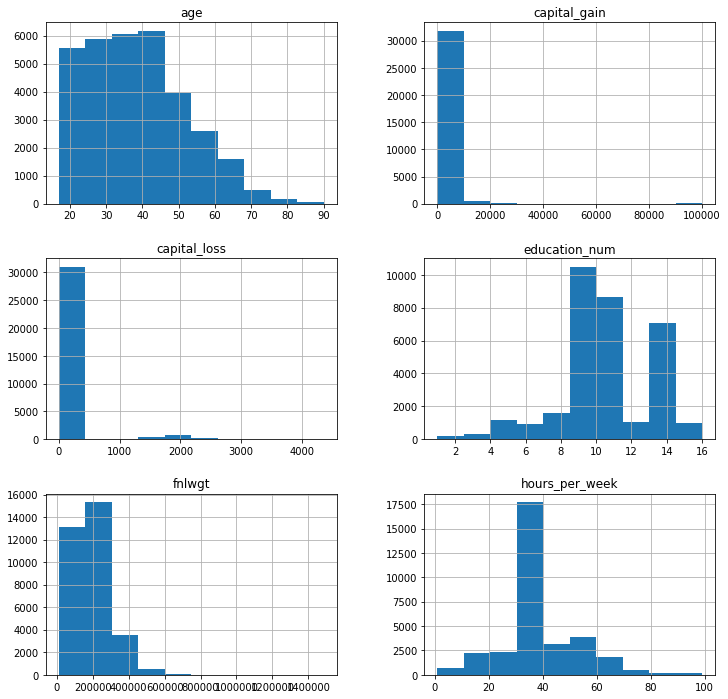

In [23]:
adult_data[list(numerical_columns.index)].hist(figsize = (12,12));

Из графиков распределения всего датасета можно сделать следующие выводы:
- около 30 тыс. людей в исследовании имеет прирост капитала от 0 до 10 тыс.долларов в год;
- такое же число людей имеет потерю капитала от 0 до 500 долларов в год;
- более 17500 людей работает полный рабочий день;
- более 25000 людей имеет ранг обучения (education_num) выше 8-го. 

Смотрим информацию по людям с заработком больше 50 тыс. долларов или равным и менее 50 тыс.долларов

In [24]:
adult_over_50k_dollars = adult_data[adult_data['income'] == '>50K']
adult_under_50k_dollars = adult_data[adult_data['income'] == '<=50K']

In [25]:
adult_over_50k_dollars.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,7839.000000,7.839000e+03,7839.000000,7839.000000,7839.000000,7839.000000
mean,44.250925,1.880005e+05,11.612195,4007.164562,195.051282,45.473402
std,10.520102,1.025545e+05,2.385181,14572.097223,595.555395,11.014165
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.191000e+05,10.000000,0.000000,0.000000,40.000000
50%,44.000000,1.760630e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.309690e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


In [26]:
adult_under_50k_dollars.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,24698.000000,2.469800e+04,24698.000000,24698.000000,24698.000000,24698.000000
mean,36.787392,1.903459e+05,9.596081,148.884970,53.190258,38.842862
std,14.017335,1.064874e+05,2.434654,963.557955,310.890099,12.318286
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,25.000000,1.176060e+05,9.000000,0.000000,0.000000,35.000000
50%,34.000000,1.794650e+05,9.000000,0.000000,0.000000,40.000000
75%,46.000000,2.389682e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


Посмотрим на распределение количественных показателей людей зарабатывающих более 50 тыс.долларов

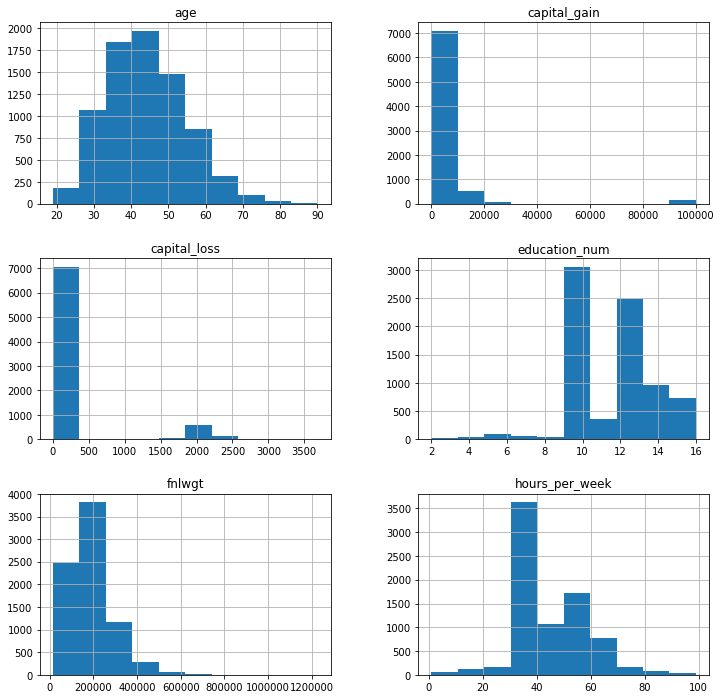

In [27]:
adult_over_50k_dollars[list(numerical_columns.index)].hist(figsize = (12,12));

Из этих графиков показателей людей зарабатывающих более 50 тыс.долларов можно сделать следующие выводы:
- около 7 тыс. людей имеет прирост капитала от 0 до 10 тыс.долларов в год;
- до 250 людей имеют имеет прирост капитала от 90000 до 100000 тыс.долларов в год (существенный выброс);
- приблизительно 3,5 тыс. людей работает от 30 до 40 часов в неделю и почти столько же имеют переработки;
- около 8 тыс. людей имеет ранг обучения выше 9-го.

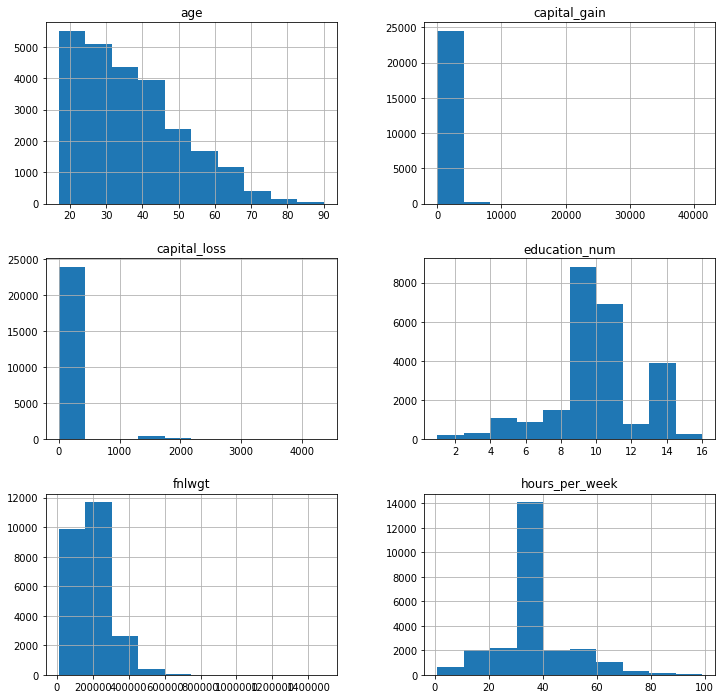

In [28]:
adult_under_50k_dollars[list(numerical_columns.index)].hist(figsize = (12,12));

Из этих графиков показателей людей зарабатывающих 50 тыс.долларов и менее можно сделать следующие выводы:
- около 24 тыс. людей имеет прирост капитала от 0 до 5 тыс.долларов в год;
- приблизительно 23 тыс. людей имеет потерю капитала от 0 до 500 долларов в год;
- немного более 14 тыс. людей работает от 30 до 40 часов в неделю;
- около 21 тыс. людей имеет ранг обучения выше 8-го.

In [29]:
adult_with_zero_capital_gain = adult_data[adult_data['capital_gain'] == 0]
adult_with_zero_capital_loss = adult_data[adult_data['capital_loss'] == 0]

In [30]:
adult_with_zero_capital_gain.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,29825.000000,2.982500e+04,29825.000000,29825.0,29825.000000,29825.000000
mean,38.091735,1.899355e+05,9.992322,0.0,95.312657,40.161174
std,13.563900,1.057527e+05,2.544370,0.0,420.130619,12.321793
min,17.000000,1.228500e+04,1.000000,0.0,0.000000,1.000000
25%,27.000000,1.177980e+05,9.000000,0.0,0.000000,40.000000
50%,36.000000,1.786440e+05,10.000000,0.0,0.000000,40.000000
75%,47.000000,2.370510e+05,12.000000,0.0,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,0.0,4356.000000,99.000000


In [31]:
adult_with_zero_capital_loss.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,31018.000000,3.101800e+04,31018.000000,31018.000000,31018.0,31018.000000
mean,38.433136,1.899908e+05,10.038365,1131.256819,0.0,40.302598
std,13.667636,1.059268e+05,2.557930,7562.751866,0.0,12.335484
min,17.000000,1.228500e+04,1.000000,0.000000,0.0,1.000000
25%,27.000000,1.177890e+05,9.000000,0.000000,0.0,40.000000
50%,37.000000,1.785510e+05,10.000000,0.000000,0.0,40.000000
75%,47.000000,2.374205e+05,12.000000,0.000000,0.0,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,0.0,99.000000


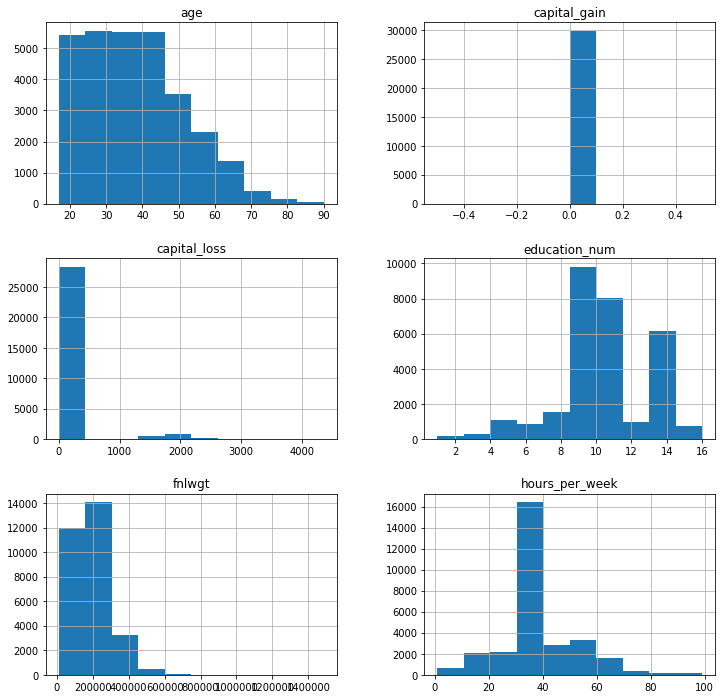

In [32]:
adult_with_zero_capital_gain[list(numerical_columns.index)].hist(figsize = (12,12));

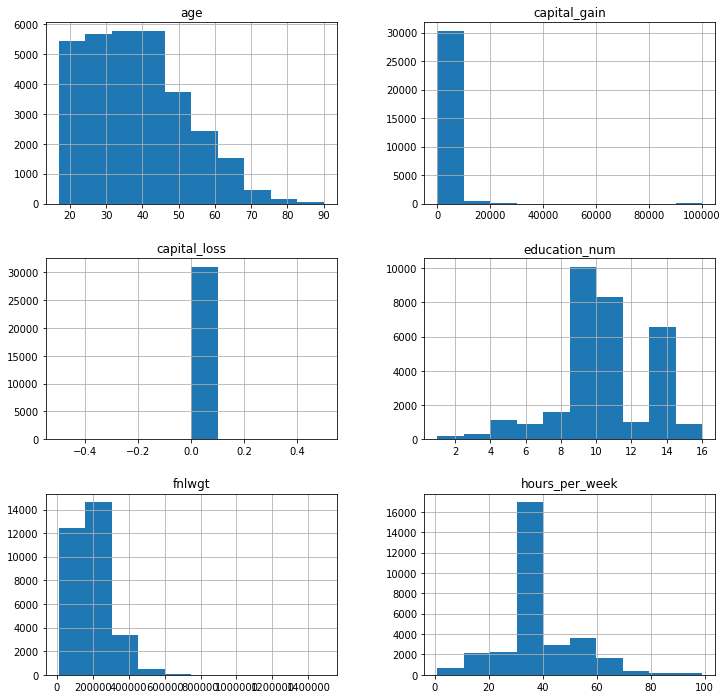

In [33]:
adult_with_zero_capital_loss[list(numerical_columns.index)].hist(figsize = (12,12));

In [34]:
adult_cap_gain_greater_0_and_over_50k = adult_over_50k_dollars[adult_over_50k_dollars['capital_gain'] > 0]
adult_cap_loss_greater_0_and_over_50k = adult_over_50k_dollars[adult_over_50k_dollars['capital_loss'] > 0]

In [35]:
adult_cap_gain_greater_0_and_over_50k.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,1677.000000,1.677000e+03,1677.000000,1677.000000,1677.0,1677.000000
mean,45.412642,1.885667e+05,11.899821,18731.164580,0.0,45.822302
std,11.199281,1.028652e+05,2.385213,26778.676066,0.0,10.965749
min,19.000000,1.930200e+04,2.000000,3103.000000,0.0,2.000000
25%,37.000000,1.193590e+05,10.000000,7298.000000,0.0,40.000000
50%,44.000000,1.750710e+05,13.000000,7896.000000,0.0,44.000000
75%,52.000000,2.342860e+05,14.000000,15024.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [36]:
adult_cap_loss_greater_0_and_over_50k.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,773.000000,773.000000,773.000000,773.0,773.000000,773.000000
mean,44.510996,187760.172057,12.006468,0.0,1978.016818,46.360931
std,10.493469,95215.853028,2.446571,0.0,264.143642,11.683338
min,22.000000,20953.000000,3.000000,0.0,653.000000,6.000000
25%,37.000000,122307.000000,10.000000,0.0,1887.000000,40.000000
50%,43.000000,175109.000000,13.000000,0.0,1902.000000,45.000000
75%,51.000000,234901.000000,14.000000,0.0,1977.000000,50.000000
max,83.000000,608184.000000,16.000000,0.0,3683.000000,99.000000


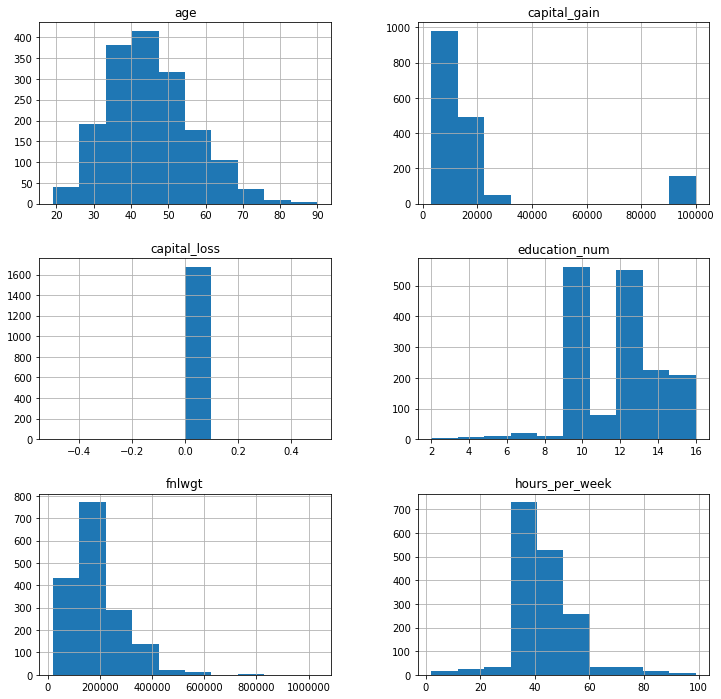

In [37]:
adult_cap_gain_greater_0_and_over_50k[list(numerical_columns.index)].hist(figsize = (12,12));

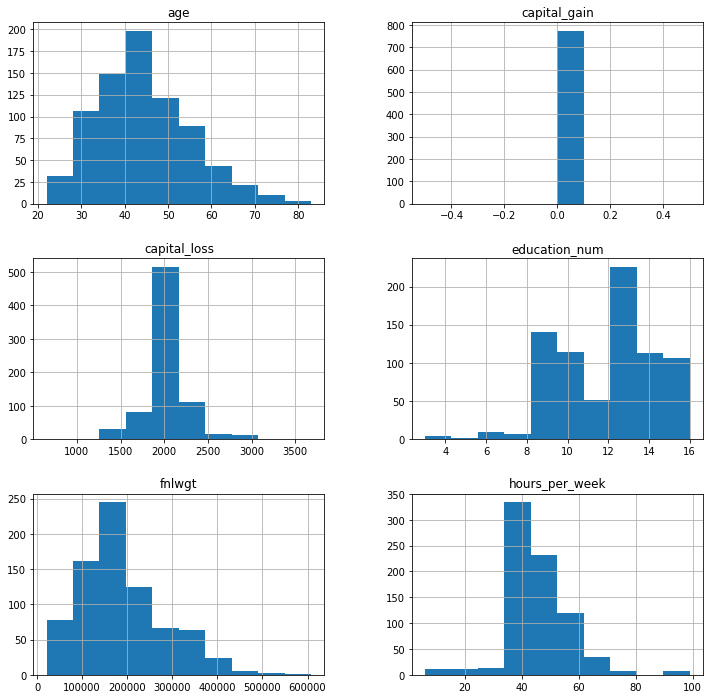

In [38]:
adult_cap_loss_greater_0_and_over_50k[list(numerical_columns.index)].hist(figsize = (12,12));

In [39]:
adult_cap_gain_greater_0_and_under_50k = adult_under_50k_dollars[adult_under_50k_dollars['capital_gain'] > 0]
adult_cap_loss_greater_0_and_under_50k = adult_under_50k_dollars[adult_under_50k_dollars['capital_loss'] > 0]

In [40]:
adult_cap_gain_greater_0_and_under_50k.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.0,1035.000000
mean,41.753623,187292.802899,9.714976,3552.812560,0.0,39.764251
std,15.810904,104247.362954,2.533894,3173.419287,0.0,13.156860
min,17.000000,19302.000000,1.000000,114.000000,0.0,1.000000
25%,29.000000,115837.500000,9.000000,2202.000000,0.0,38.000000
50%,39.000000,177825.000000,9.000000,3273.000000,0.0,40.000000
75%,52.000000,239596.000000,11.000000,4101.000000,0.0,45.000000
max,90.000000,930948.000000,16.000000,41310.000000,0.0,99.000000


In [41]:
adult_cap_loss_greater_0_and_under_50k.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,746.000000,746.000000,746.000000,746.0,746.000000,746.000000
mean,38.782842,183143.652815,9.894102,0.0,1760.982574,40.032172
std,13.927657,100063.024134,2.500103,0.0,438.906164,11.990445
min,17.000000,20956.000000,1.000000,0.0,155.000000,1.000000
25%,28.000000,116425.000000,9.000000,0.0,1590.000000,40.000000
50%,37.000000,175128.500000,10.000000,0.0,1721.000000,40.000000
75%,47.000000,224999.500000,12.000000,0.0,1980.000000,43.750000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,98.000000


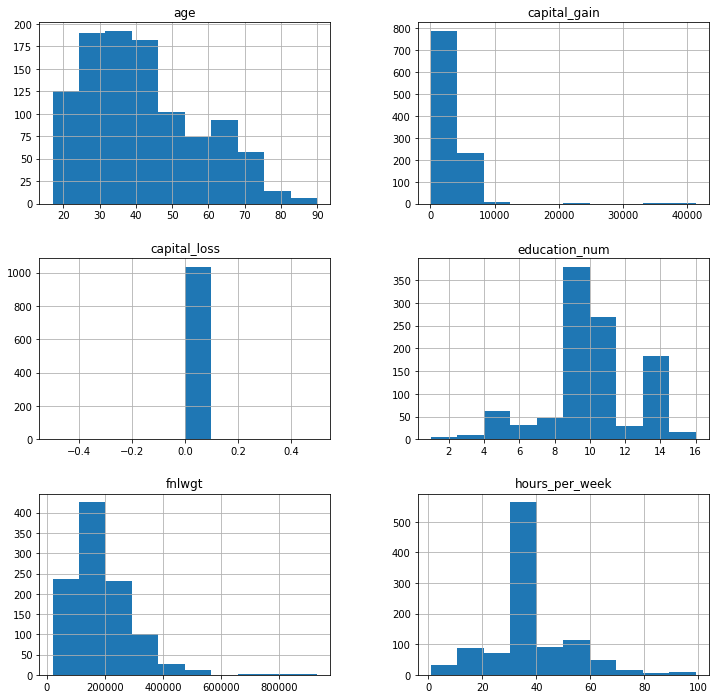

In [42]:
adult_cap_gain_greater_0_and_under_50k[list(numerical_columns.index)].hist(figsize = (12,12));

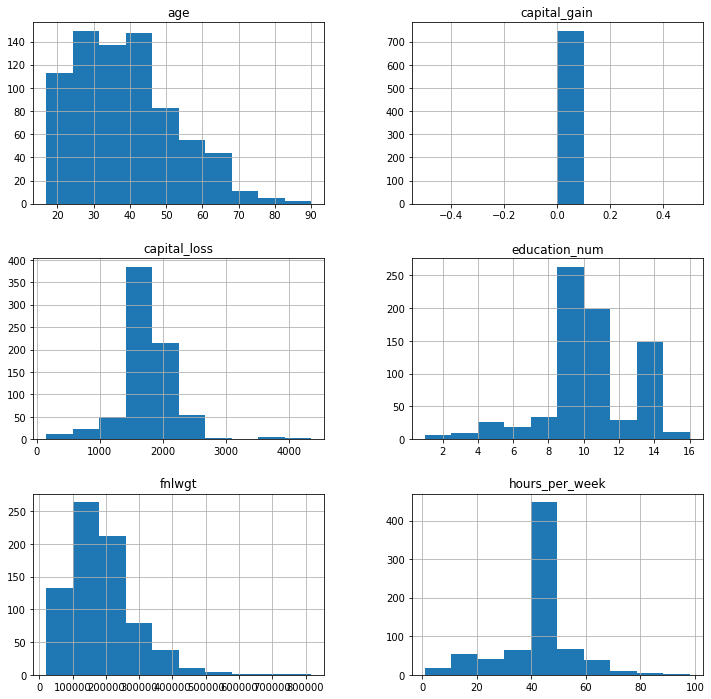

In [43]:
adult_cap_loss_greater_0_and_under_50k[list(numerical_columns.index)].hist(figsize = (12,12));

In [44]:
print('Общее количество людей в исследовании:', adult_data.shape[0])
print('')
print('Количество людей c приростом капитала равным 0:', adult_with_zero_capital_gain['capital_gain'].count(), 'и они составляют {:.2%}'.format(adult_with_zero_capital_gain['capital_gain'].count() / adult_data.shape[0]))
print('Количество людей c приростом капитала больше 0:', (adult_data.shape[0] - adult_with_zero_capital_gain['capital_gain'].count()), 'и они составляют {:.2%}'.format((adult_data.shape[0] - adult_with_zero_capital_gain['capital_gain'].count()) / adult_data.shape[0]))
print('Количество людей с потерей капитала равным 0:', adult_with_zero_capital_loss['capital_loss'].count(), 'и они составляют {:.2%}'.format(adult_with_zero_capital_loss['capital_gain'].count() / adult_data.shape[0]))
print('Количество людей с потерей капитала больше 0:', (adult_data.shape[0] - adult_with_zero_capital_loss['capital_loss'].count()), 'и они составляют {:.2%}'.format((adult_data.shape[0] - adult_with_zero_capital_loss['capital_gain'].count()) / adult_data.shape[0]))
print('')
print('Количество людей что зарабатывает больше 50000$:', adult_over_50k_dollars['income'].count(), 'и они составляют {:.2%}'.format(adult_over_50k_dollars['capital_gain'].count() / adult_data.shape[0]))
print('c приростом капитала больше 0:', adult_cap_gain_greater_0_and_over_50k['income'].count(), 'и они составляют {:.2%}'.format(adult_cap_gain_greater_0_and_over_50k['capital_gain'].count() / adult_data.shape[0]))
print('c потерей капитала больше 0:',adult_cap_loss_greater_0_and_over_50k['income'].count(), 'и они составляют {:.2%}'.format(adult_cap_loss_greater_0_and_over_50k['capital_gain'].count() / adult_data.shape[0]))
print('')
print('Количество людей что зарабатывает 50000$ и менее:', adult_under_50k_dollars['income'].count(), 'и они составляют {:.2%}'.format(adult_under_50k_dollars['capital_gain'].count() / adult_data.shape[0]))
print('c приростом капитала больше 0:', adult_cap_gain_greater_0_and_under_50k['income'].count(), 'и они составляют {:.2%}'.format(adult_cap_gain_greater_0_and_under_50k['capital_gain'].count() / adult_data.shape[0]))
print('c потерей капитала больше 0:',adult_cap_loss_greater_0_and_under_50k['income'].count(), 'и они составляют {:.2%}'.format(adult_cap_loss_greater_0_and_under_50k['capital_gain'].count() / adult_data.shape[0]))


Общее количество людей в исследовании: 32537

Количество людей c приростом капитала равным 0: 29825 и они составляют 91.66%
Количество людей c приростом капитала больше 0: 2712 и они составляют 8.34%
Количество людей с потерей капитала равным 0: 31018 и они составляют 95.33%
Количество людей с потерей капитала больше 0: 1519 и они составляют 4.67%

Количество людей что зарабатывает больше 50000$: 7839 и они составляют 24.09%
c приростом капитала больше 0: 1677 и они составляют 5.15%
c потерей капитала больше 0: 773 и они составляют 2.38%

Количество людей что зарабатывает 50000$ и менее: 24698 и они составляют 75.91%
c приростом капитала больше 0: 1035 и они составляют 3.18%
c потерей капитала больше 0: 746 и они составляют 2.29%


Сравним количество людей зарабатывающих более 50 тыс. долларов или равно и менее 50 тыс.долларов в следующих диаграммах

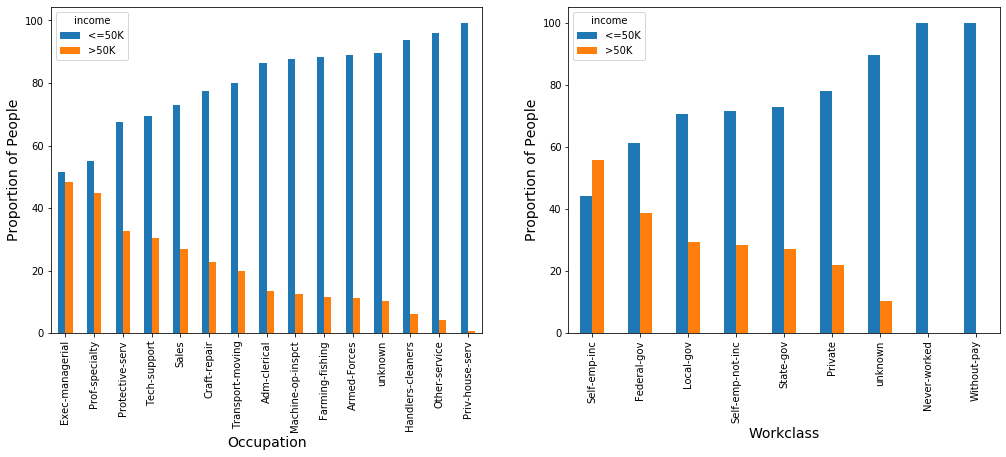

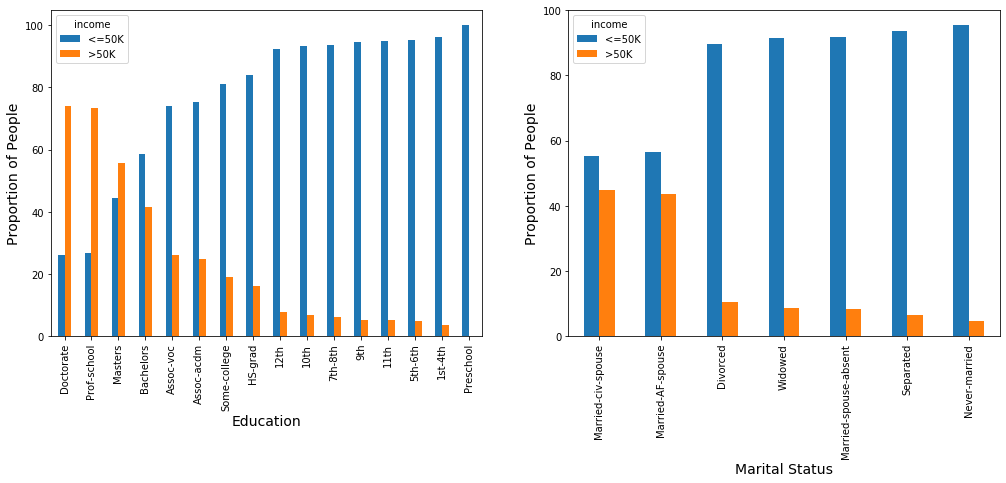

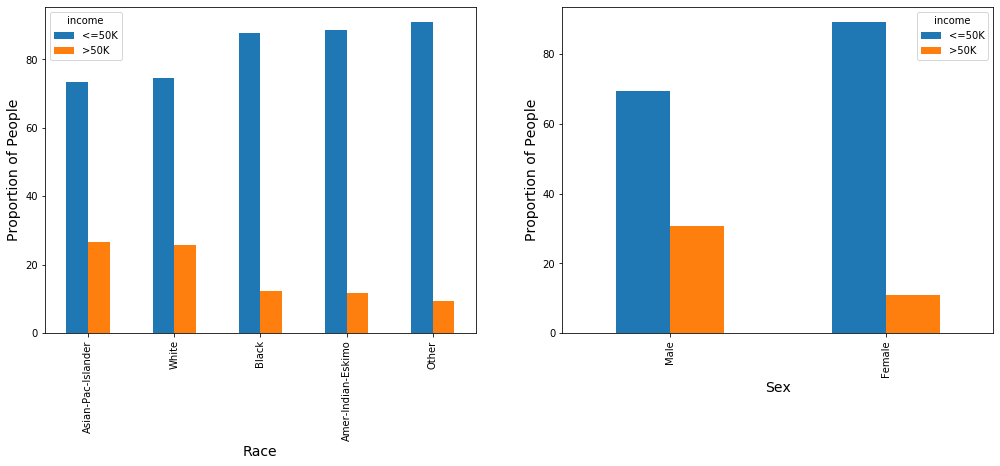

In [45]:
table_occu = pd.crosstab(adult_data['occupation'], adult_data['income'])
table_workclass = pd.crosstab(adult_data['workclass'], adult_data['income'])
table_edu = pd.crosstab(adult_data['education'], adult_data['income'])
table_marital = pd.crosstab(adult_data['marital_status'], adult_data['income'])
table_race = pd.crosstab(adult_data['race'], adult_data['income'])
table_sex = pd.crosstab(adult_data['sex'], adult_data['income'])
table_country = pd.crosstab(adult_data['native_country'], adult_data['income'])


fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

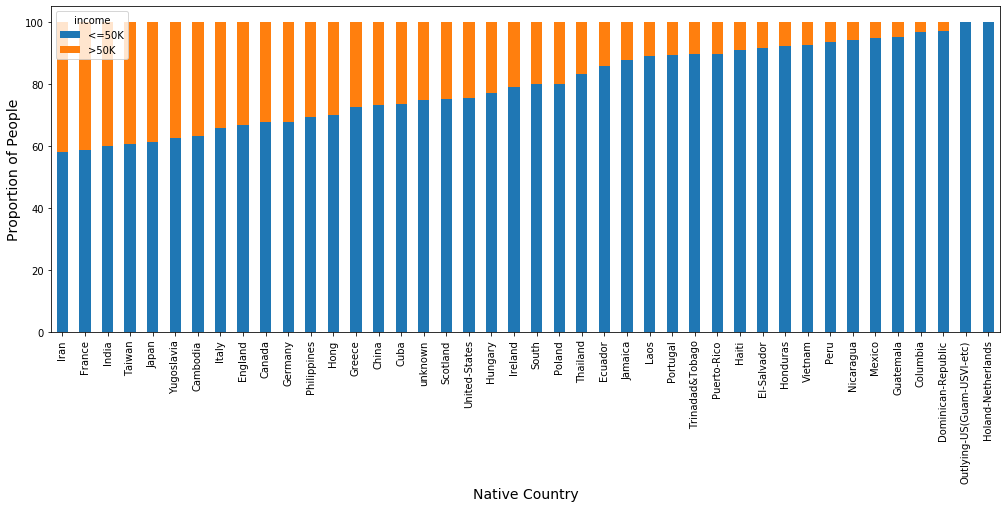

In [46]:
table_country = pd.crosstab(adult_data['native_country'], adult_data['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Из этих столбиковых диаграм можно сделать следующие выводы:
- в диаграмме профессий, доля людей, получающих зарплату менее 50 тыс.долларов в год, выше;
- из всего рабочего класса только 59% самозанятых людей получают зарплату более 50 тысяч;
- более 50% людей имеющих магистерскую степень и выше имеют более 50 тыс.долларов в год;
- около 40% состоящих в браке людей получают зарплату больше 50 тыс.долларов в год;
- в каждой из рас от 5 до 25% людей зарабатывают более 50 тыс.долларов в год;
- из общего числа мужчин около 30% из них получают зарплату более 50 тыс.долларов в год, менее 15% женщин из общего числа зарабатывают более 50 тыс.долларов в год.

Посмотрим корреляцию между числовыми значениями

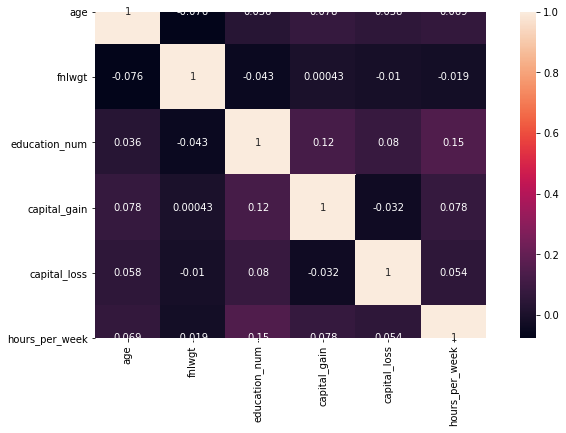

In [47]:
fig = plt.figure(figsize = (12,6))
sns.heatmap(adult_data[list(numerical_columns.index)].corr(), annot = True, square = True)

Исходя из данной карты можно сделать следующие выводы о силе корреляции показателей

Сильные:
- 0.15 - ранг обучения и к-во часов в неделю;
- 0.12 - ранг обучения и рост капитала;

Умеренные:
- 0.08 - ранг обучения и потеря капитала;
- 0.078 - возраст и рост капитала;
- 0.069 - возраст и к-во часов в неделю;
- 0.058 - возраст и потеря капитала;
- 0.054 - потеря капитала и к-во часов в неделю.


Выводы по показателями выбросов:
- прирост капитала в 99999 не следует какой-либо схеме и по графику выше он четко выделяется как выброс;
- в наборе данных есть люди в возрасте 90 лет и работающие более 40 часов в неделю.

Дублирующие колонки:
- колонка с образованим и рангом образования дают аналогичную информацию;
- колонка отношения и семейное положение подразумевают схожую информацию.

Следовательно, мы будем сохранять только одну из них.

## **Подготавливаем данные для машинного обучения**

In [48]:
# удаляем строки где увеличение капитала в год равно 99999

print("К-во людей в датасете:", adult_data.shape[0])

index_gain = adult_data[adult_data['capital_gain'] == 99999].index

adult_data.drop(labels = index_gain, axis = 0, inplace =True)

print("К-во людей после удаления:", adult_data.shape[0])

К-во людей в датасете: 32537
К-во людей после удаления: 32378


In [49]:
# удаляем строки с возрастом 90 лет

print("К-во людей в датасете:", adult_data.shape[0])

index_age = adult_data[adult_data['age'] == 90].index

adult_data.drop(labels = index_age,axis = 0, inplace =True)

print("К-во людей после удаления:", adult_data.shape[0])

К-во людей в датасете: 32378
К-во людей после удаления: 32336


In [50]:
# удаляем колонки дублирующую информацию

print(f"К-во колонок: {adult_data.shape[1]}")

delete_columns = ['relationship','education_num']

adult_data.drop(labels = delete_columns,axis = 1,inplace = True)

print(f"К-во колонок после удаления: {adult_data.shape[1]}")

К-во колонок: 15
К-во колонок после удаления: 13


In [51]:
categorical_columns_new = (adult_data.dtypes[adult_data.dtypes == 'object']).index
numerical_columns_new = (adult_data.dtypes[adult_data.dtypes == 'int64']).index

In [52]:
categorical_columns_new

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'native_country', 'income'],
      dtype='object')

In [53]:
numerical_columns_new

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'], dtype='object')

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_data[numerical_columns_new]), columns = numerical_columns_new).head(5)

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,0.915493,0.081896,0.0,1.000000,0.173469
1,0.690141,0.118021,0.0,1.000000,0.397959
2,0.521127,0.086982,0.0,0.895317,0.397959
3,0.338028,0.171404,0.0,0.895317,0.397959
4,0.239437,0.138941,0.0,0.865473,0.448980


In [55]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = numerical_columns_new 
        return df
    
pipeline = Pipeline([('selector',DataFrameSelector(numerical_columns_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [56]:
num_df = pipeline.fit_transform(adult_data)
num_df.shape

(32336, 5)

In [57]:
# колонки которые не нужны после создание фиктивных переменных

cols = ['workclass_Govt_employess','education_Some-college', 'marital_status_Never-married','occupation_Other-service', 'race_Black','sex_Male','income_>50K']

In [58]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)]         
        return df_new

pipeline_cat=Pipeline([('selector', DataFrameSelector(categorical_columns_new)),
                      ('dummies', dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_data)
cat_df.shape

(32336, 92)

In [59]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))

num_df['id'] = pd.Series(range(num_df.shape[0]))

final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')

print(f"К-во наблюдений в финальном датасете: {final_df.shape}")

К-во наблюдений в финальном датасете: (32135, 98)


## **Тренируем и настраиваем модели**

In [60]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

Импортируем библиотеки для машинного обучения

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [63]:
# определяем классификаторы

clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [64]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

In [65]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'}

In [66]:
# тренируем модели и возвращает оценку точности

def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res функция вычисляет путаницу матрицы

def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 84.4536%
Null Accuracy: 23.5250%
Confusion Matrix
[[1063  827]
 [ 422 5722]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.4536%
Recall Score: 93.1315%
Specificity Score: 56.2434%
False Positive Rate: 43.7566%
Precision Score: 87.3721%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1890
           1       0.87      0.93      0.90      6144

    accuracy                           0.84      8034
   macro avg       0.79      0.75      0.77      8034
weighted avg       0.84      0.84      0.84      8034

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTr

In [67]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores', ascending = False)

,Accuracy Scores
Adaboost,0.851880
SVC,0.846154
LogisticRegression,0.844536
RandomForest,0.842544
Extratrees,0.828479
Bagging,0.827608
KNN,0.815534
DecisionTree,0.800100
Naive,0.377769


In [68]:
models_new = {clf_logreg:'LogisticRegression',        
              clf_forest: 'RandomForest',
              clf_ada: 'Adaboost',
              clf_bagging: 'Bagging'}

classifiers_new = models_new.values()

In [69]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Time taken to complete training LogisticRegression model: (hh:mm:ss.ms) 0:00:06.406366
Time taken to complete training RandomForest model: (hh:mm:ss.ms) 0:00:42.672441
Time taken to complete training Adaboost model: (hh:mm:ss.ms) 0:00:21.240215
Time taken to complete training Bagging model: (hh:mm:ss.ms) 0:00:26.834535


In [70]:
pd.DataFrame(mean_score,index = classifiers_new, columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
Adaboost,0.855234
LogisticRegression,0.847517
RandomForest,0.840836
Bagging,0.825817


In [71]:
param_grid_logreg = {'C':[0.0001,0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
param_grid_rf = {'n_estimators' : [50,60],
               'max_depth': range(5,16,2)}
param_grid_ada = {'n_estimators':[50,60,70]}
param_grid_bagging = {'n_estimators':[50,60,70]}

In [72]:
def feature_selection(model,X_train,y_train):
    rfe_model = RFE(model)
    rfe_model = rfe_model.fit(X_train,y_train)
    X_train_cols = list(X_train.columns[rfe_model.support_])
    X_train_new = X_train[X_train_cols]
    return X_train_new

def grid(model,parameters,X_train_new):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, return_train_score = False,
                        scoring = 'accuracy')
    grid.fit(X_train_new,y_train)
    return grid.best_score_, grid.best_estimator_

def main(model,X_train,y_train,parameters):
    X_train_modi = feature_selection(model,X_train,y_train)
    grid_best_score,grid_best_params = grid(model,parameters,X_train_modi)
    return grid_best_score,grid_best_params,X_train_modi

In [73]:
grid_best_score_logreg, grid_best_params_logreg , X_train_modi_logreg = main(clf_logreg,X_train,y_train,param_grid_logreg)
grid_best_score_rf, grid_best_params_rf , X_train_modi_rf = main(clf_forest,X_train,y_train,param_grid_rf)
grid_best_score_ab, grid_best_params_ab , X_train_modi_ab = main(clf_ada,X_train,y_train,param_grid_ada)
grid_best_score_bc, grid_best_params_bc , X_train_modi_bc = main(clf_ada,X_train,y_train,param_grid_bagging)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

## **Итоги**

После обучения нейросети мы имеем следущие оценки точности предсказания

In [74]:
pd.DataFrame([grid_best_score_logreg, grid_best_score_rf,grid_best_score_ab,grid_best_score_bc],
             index = ['LogisticRegression','RandomForest','AdaBoost','Bagging'],
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score',ascending  = False)

,Accuracy Score
AdaBoost,0.856271
Bagging,0.856271
RandomForest,0.854695
LogisticRegression,0.846853


In [77]:
print("К-во оценщиков:",grid_best_params_ab.get_params()['n_estimators'])

К-во оценщиков: 70
